In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
rm -rf /kaggle/working/yolo11n.pt

In [3]:
# Jika koneksi sudah baik, perintah ini seharusnya bekerja.
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="htjfG8lfjsM7TJvYEt2M")
project = rf.workspace("ppe-igka1").project("construction-ppe-xmvs4")
version = project.version(2)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 96.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30


Extracting Dataset Version Zip to construction-ppe-2 in yolov11:: 100%|██████████| 5204/5204 [00:00<00:00, 6819.15it/s]


In [5]:
%%writefile /kaggle/working/construction-ppe-2/data.yaml
path: /kaggle/working/construction-ppe-2 # Sesuaikan path ini ke lokasi dataset Anda di Kaggle
train: 'train/images'
val: 'valid/images'
test: 'test/images'

# number of classes
nc: 13 # Jumlah kelas

# Class names
names:
  - Gloves
  - Goggles
  - Helmet
  - Mask
  - NO-Gloves
  - NO-Goggles
  - NO-Helmet
  - NO-Mask
  - NO-Shoes
  - NO-Vest
  - Person
  - Shoes
  - Vest

Overwriting /kaggle/working/construction-ppe-2/data.yaml


In [6]:
import os

# Definisikan mapping kelas lama ke kelas baru
# Ambil dari data.yaml asli dan data.yaml baru Anda
old_class_mapping = {
    'Person': 8, # Asumsikan 'Person' adalah indeks 8 di dataset asli Roboflow
    'Hardhat': 2, # Asumsikan 'Hardhat' adalah indeks 2 di dataset asli Roboflow
    'Mask': 4,    # Asumsikan 'Mask' adalah indeks 4 di dataset asli Roboflow
    'Safety Vest': 11, # Asumsikan 'Safety Vest' adalah indeks 11 di dataset asli Roboflow
    'NO-Hardhat': 5, # Asumsikan 'NO-Hardhat' adalah indeks 5 di dataset asli Roboflow
    'NO-Mask': 6,    # Asumsikan 'NO-Mask' adalah indeks 6 di dataset asli Roboflow
    'NO-Safety Vest': 7 # Asumsikan 'NO-Safety Vest' adalah indeks 7 di dataset asli Roboflow
}

new_class_mapping = {
    8: 0,  # Person (indeks lama) -> 0 (indeks baru)
    2: 1,  # Hardhat (indeks lama) -> 1 (indeks baru)
    4: 2,  # Mask (indeks lama) -> 2 (indeks baru)
    11: 3, # Safety Vest (indeks lama) -> 3 (indeks baru)
    5: 4,  # NO-Hardhat (indeks lama) -> 4 (indeks baru)
    6: 5,  # NO-Mask (indeks lama) -> 5 (indeks baru)
    7: 6   # NO-Safety Vest (indeks lama) -> 6 (indeks baru)
}

# Daftar kelas yang akan dipertahankan (berdasarkan nama)
desired_classes_names = [
    'Person', 'Hardhat', 'Mask', 'Safety Vest',
    'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest'
]

# Path ke direktori dataset Anda
dataset_path = '/kaggle/working/Construction-Site-Safety-1' # Ganti jika path Anda berbeda

# Loop melalui train, valid, test sets
for subset in ['train', 'valid', 'test']:
    labels_dir = os.path.join(dataset_path, subset, 'labels')
    print(f"Processing labels in: {labels_dir}")

    if not os.path.exists(labels_dir):
        print(f"Directory not found: {labels_dir}. Skipping.")
        continue

    for filename in os.listdir(labels_dir):
        if filename.endswith('.txt'):
            filepath = os.path.join(labels_dir, filename)
            
            with open(filepath, 'r') as f:
                lines = f.readlines()
            
            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if not parts:
                    continue
                
                old_class_id = int(parts[0])
                
                # Cek apakah indeks kelas lama ada di mapping baru
                if old_class_id in new_class_mapping:
                    new_class_id = new_class_mapping[old_class_id]
                    # Gabungkan indeks kelas baru dengan koordinat bounding box yang sama
                    new_line = f"{new_class_id} {' '.join(parts[1:])}\n"
                    new_lines.append(new_line)
            
            # Tulis ulang file dengan anotasi yang sudah diperbarui
            with open(filepath, 'w') as f:
                f.writelines(new_lines)
    print(f"Finished processing {subset} labels.")

print("Label files updated successfully for desired classes and new indices!")

Processing labels in: /kaggle/working/Construction-Site-Safety-1/train/labels
Directory not found: /kaggle/working/Construction-Site-Safety-1/train/labels. Skipping.
Processing labels in: /kaggle/working/Construction-Site-Safety-1/valid/labels
Directory not found: /kaggle/working/Construction-Site-Safety-1/valid/labels. Skipping.
Processing labels in: /kaggle/working/Construction-Site-Safety-1/test/labels
Directory not found: /kaggle/working/Construction-Site-Safety-1/test/labels. Skipping.
Label files updated successfully for desired classes and new indices!


In [7]:
!cat /kaggle/working/construction-ppe-2/data.yaml

path: /kaggle/working/construction-ppe-2 # Sesuaikan path ini ke lokasi dataset Anda di Kaggle
train: 'train/images'
val: 'valid/images'
test: 'test/images'

# number of classes
nc: 13 # Jumlah kelas

# Class names
names:
  - Gloves
  - Goggles
  - Helmet
  - Mask
  - NO-Gloves
  - NO-Goggles
  - NO-Helmet
  - NO-Mask
  - NO-Shoes
  - NO-Vest
  - Person
  - Shoes
  - Vest


In [8]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 75.6MB/s]


In [9]:
results = model.train(data='/kaggle/working/construction-ppe-2/data.yaml', imgsz=640, epochs=50, batch=8, save=True, optimizer="SGD")

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/construction-ppe-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /kaggle/working/construction-ppe-2/train/labels... 2022 images, 144 backgrounds, 0 corrupt: 100%|██████████| 2022/2022 [00:01<00:00, 1288.85it/s]

train: New cache created: /kaggle/working/construction-ppe-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 506.3±140.7 MB/s, size: 59.7 KB)


val: Scanning /kaggle/working/construction-ppe-2/valid/labels... 356 images, 30 backgrounds, 0 corrupt: 100%|██████████| 356/356 [00:00<00:00, 1243.90it/s]

val: New cache created: /kaggle/working/construction-ppe-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.57G      1.662      3.851      1.534         46        640: 100%|██████████| 253/253 [00:33<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  5.88it/s]


                   all        356       1576      0.225      0.264      0.199     0.0954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.58G      1.665      2.536      1.511         71        640: 100%|██████████| 253/253 [00:30<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  8.88it/s]


                   all        356       1576      0.516      0.381      0.329      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.59G      1.658      2.256      1.513         32        640: 100%|██████████| 253/253 [00:29<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  8.33it/s]


                   all        356       1576      0.281      0.251      0.166     0.0732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       1.6G      1.707       2.27      1.522         51        640: 100%|██████████| 253/253 [00:29<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  8.88it/s]


                   all        356       1576      0.442      0.366      0.315      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.61G      1.704      2.151      1.528         65        640: 100%|██████████| 253/253 [00:29<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.01it/s]


                   all        356       1576      0.485      0.373      0.372      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.62G      1.678      2.046      1.499         39        640: 100%|██████████| 253/253 [00:29<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.04it/s]


                   all        356       1576      0.568      0.383      0.389      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.63G      1.636      1.936      1.464         53        640: 100%|██████████| 253/253 [00:29<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.02it/s]


                   all        356       1576      0.554        0.4      0.408      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.64G      1.636      1.907       1.47         69        640: 100%|██████████| 253/253 [00:29<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.25it/s]


                   all        356       1576      0.585      0.472      0.474      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.65G      1.611      1.804      1.445         71        640: 100%|██████████| 253/253 [00:29<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.35it/s]


                   all        356       1576      0.604      0.487      0.488      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.66G      1.584      1.767       1.44         81        640: 100%|██████████| 253/253 [00:29<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.42it/s]


                   all        356       1576      0.649      0.483        0.5      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.67G      1.558      1.697      1.416         35        640: 100%|██████████| 253/253 [00:29<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  8.94it/s]


                   all        356       1576      0.549      0.505      0.487      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.68G      1.553      1.667      1.413         89        640: 100%|██████████| 253/253 [00:29<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.32it/s]


                   all        356       1576      0.564      0.492      0.494      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.69G      1.536       1.64      1.412         19        640: 100%|██████████| 253/253 [00:29<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.35it/s]


                   all        356       1576      0.622      0.538      0.538      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       1.7G      1.519      1.563      1.393         61        640: 100%|██████████| 253/253 [00:29<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.51it/s]


                   all        356       1576        0.7      0.538      0.564      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.89G      1.504      1.556       1.39         44        640: 100%|██████████| 253/253 [00:29<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.58it/s]

                   all        356       1576       0.61      0.528      0.546      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       1.9G      1.495      1.494      1.378         43        640: 100%|██████████| 253/253 [00:29<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.61it/s]


                   all        356       1576      0.644      0.554       0.56      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.91G      1.487      1.486      1.369        116        640: 100%|██████████| 253/253 [00:30<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.48it/s]


                   all        356       1576      0.649      0.548      0.571       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.92G      1.483       1.47      1.359         74        640: 100%|██████████| 253/253 [00:29<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.40it/s]


                   all        356       1576      0.597      0.581      0.582      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.93G      1.465      1.423      1.351         21        640: 100%|██████████| 253/253 [00:29<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.28it/s]


                   all        356       1576      0.608      0.592      0.587      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.94G      1.446      1.404      1.346         68        640: 100%|██████████| 253/253 [00:29<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.59it/s]


                   all        356       1576      0.679       0.57      0.594      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.95G       1.45      1.378       1.35         66        640: 100%|██████████| 253/253 [00:29<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.66it/s]

                   all        356       1576      0.681      0.568      0.597      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.96G      1.424      1.329      1.333         22        640: 100%|██████████| 253/253 [00:29<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.38it/s]


                   all        356       1576      0.641      0.572      0.604      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.97G      1.421      1.338      1.326         54        640: 100%|██████████| 253/253 [00:30<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.37it/s]


                   all        356       1576      0.686      0.575      0.598      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.98G      1.415      1.301       1.32         48        640: 100%|██████████| 253/253 [00:29<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.52it/s]


                   all        356       1576      0.671      0.621      0.626      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.99G      1.398      1.267      1.299         77        640: 100%|██████████| 253/253 [00:29<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.48it/s]


                   all        356       1576      0.663      0.609      0.636       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         2G      1.393       1.28      1.311         40        640: 100%|██████████| 253/253 [00:29<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.58it/s]


                   all        356       1576       0.67      0.616      0.621      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.01G      1.392      1.265      1.316         67        640: 100%|██████████| 253/253 [00:29<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.51it/s]

                   all        356       1576      0.649       0.61      0.616       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.02G      1.386      1.215       1.29         51        640: 100%|██████████| 253/253 [00:29<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.56it/s]


                   all        356       1576      0.652      0.619      0.628      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.03G      1.359       1.22      1.284         62        640: 100%|██████████| 253/253 [00:29<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.66it/s]

                   all        356       1576      0.643       0.62      0.631      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.04G      1.367      1.206      1.288         51        640: 100%|██████████| 253/253 [00:30<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.88it/s]

                   all        356       1576      0.672      0.607      0.621      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.05G      1.353      1.196      1.271         67        640: 100%|██████████| 253/253 [00:30<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.50it/s]

                   all        356       1576      0.657      0.628      0.633      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.06G      1.337      1.183      1.271         55        640: 100%|██████████| 253/253 [00:30<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.47it/s]

                   all        356       1576      0.687      0.637      0.639      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.07G      1.318      1.156      1.262         63        640: 100%|██████████| 253/253 [00:30<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.42it/s]

                   all        356       1576      0.676      0.626      0.652       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.08G      1.313      1.133      1.256         66        640: 100%|██████████| 253/253 [00:30<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.39it/s]


                   all        356       1576      0.664      0.663      0.652       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.09G      1.315      1.136       1.26         34        640: 100%|██████████| 253/253 [00:30<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.42it/s]


                   all        356       1576      0.667      0.645      0.647      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.1G      1.306      1.093      1.244         54        640: 100%|██████████| 253/253 [00:29<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.56it/s]


                   all        356       1576      0.647      0.661      0.645      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.11G      1.304      1.088       1.24         22        640: 100%|██████████| 253/253 [00:30<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.84it/s]

                   all        356       1576      0.698      0.641       0.66      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.12G      1.294      1.082      1.244         45        640: 100%|██████████| 253/253 [00:29<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.71it/s]

                   all        356       1576      0.697      0.654      0.657      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.13G      1.295      1.074       1.24         37        640: 100%|██████████| 253/253 [00:30<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.51it/s]


                   all        356       1576      0.678      0.659      0.659      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.14G      1.286      1.087       1.23         91        640: 100%|██████████| 253/253 [00:30<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.71it/s]

                   all        356       1576      0.703      0.646      0.663      0.387


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.15G      1.274      1.019      1.256         19        640: 100%|██████████| 253/253 [00:30<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.40it/s]


                   all        356       1576      0.675      0.656      0.661      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.16G      1.255     0.9806       1.24         27        640: 100%|██████████| 253/253 [00:29<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.39it/s]


                   all        356       1576      0.672      0.673      0.662      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.17G      1.253     0.9596      1.229        104        640: 100%|██████████| 253/253 [00:29<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.10it/s]


                   all        356       1576      0.725      0.627      0.667      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.18G      1.231     0.9303      1.223         21        640: 100%|██████████| 253/253 [00:29<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.06it/s]

                   all        356       1576      0.691      0.668      0.665      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.19G      1.226     0.9247      1.227         16        640: 100%|██████████| 253/253 [00:29<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  8.83it/s]

                   all        356       1576      0.713      0.662      0.673      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.2G      1.214       0.91      1.209         28        640: 100%|██████████| 253/253 [00:29<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.02it/s]

                   all        356       1576      0.708      0.663      0.674      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.21G      1.209     0.9004      1.203         19        640: 100%|██████████| 253/253 [00:29<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.12it/s]


                   all        356       1576      0.694      0.681      0.682      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.22G      1.194     0.8826        1.2         22        640: 100%|██████████| 253/253 [00:29<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.13it/s]

                   all        356       1576      0.723       0.66      0.681      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.23G      1.176     0.8704      1.191         40        640: 100%|██████████| 253/253 [00:29<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.08it/s]


                   all        356       1576      0.716      0.665       0.68      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.24G      1.174     0.8621       1.19         35        640: 100%|██████████| 253/253 [00:29<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:02<00:00,  9.15it/s]


                   all        356       1576       0.73      0.651      0.686      0.417

50 epochs completed in 0.454 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  5.93it/s]
invalid value encountered in less
invalid value encountered in less


                   all        356       1576      0.729      0.652      0.686      0.417
                Gloves         24         66      0.796      0.409      0.506      0.276
               Goggles        169        194      0.881      0.951       0.96      0.555
                Helmet         99        202      0.916      0.862      0.904      0.631
                  Mask         28         30      0.964        0.8      0.864       0.65
             NO-Gloves         32         63      0.319      0.365      0.359      0.204
            NO-Goggles        169        201      0.892      0.965      0.965      0.554
             NO-Helmet         50        100      0.827        0.7      0.738      0.426
               NO-Mask         70        129      0.692      0.411      0.508      0.178
              NO-Shoes          8         18      0.367        0.5      0.398       0.17
               NO-Vest         67        123      0.817      0.689       0.74      0.479
                Perso

In [10]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt source=/kaggle/working/construction-ppe-2/test/images save=True conf=0.5

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/218 /kaggle/working/construction-ppe-2/test/images/-4405-_png_jpg.rf.9e43f2bee0d2bcdf070bfbf90ae07a61.jpg: 640x640 (no detections), 10.7ms
image 2/218 /kaggle/working/construction-ppe-2/test/images/000005_jpg.rf.38e41f95adfc2923d03add75a53248ee.jpg: 640x640 1 Gloves, 2 Helmets, 8.5ms
image 3/218 /kaggle/working/construction-ppe-2/test/images/000005_jpg.rf.ac3a4091bd582a550ccd7e4f9337a8a0.jpg: 640x640 1 Gloves, 2 Helmets, 9.0ms
image 4/218 /kaggle/working/construction-ppe-2/test/images/002551_jpg.rf.ecae21f60e1890f260a44acd5bbcfcdf.jpg: 640x640 1 Gloves, 2 Helmets, 1 NO-Vest, 1 Shoes, 8.3ms
image 5/218 /kaggle/working/construction-ppe-2/test/images/002551_jpg.rf.f1ba158ac0f2852fb98669cf8903249d.jpg: 640x640 1 Gloves, 2 Helmets, 1 NO-Vest, 1 Shoes, 8.2ms
image 6/218 /kaggle/working/construction-ppe-2/test/images/003

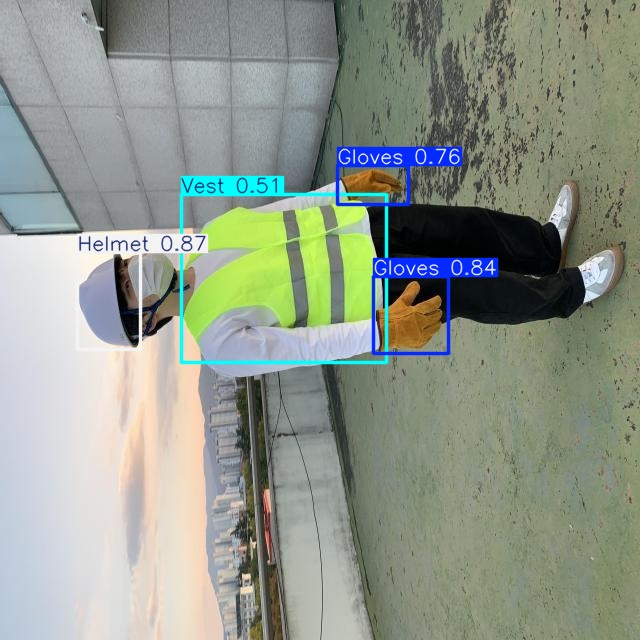

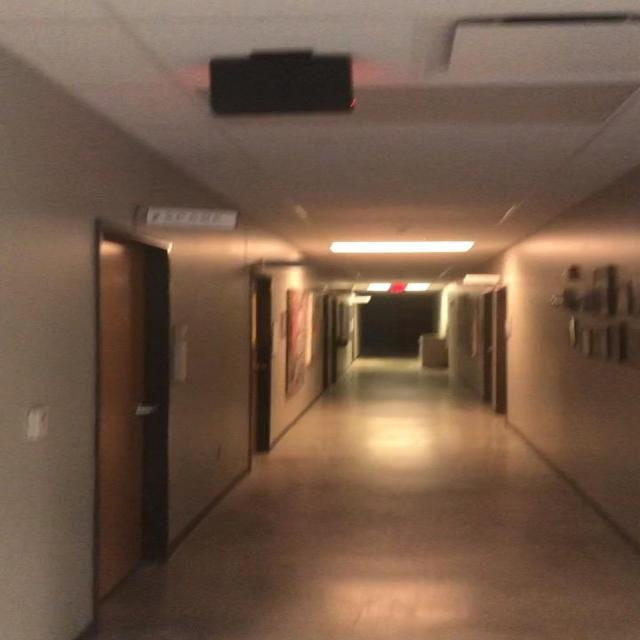

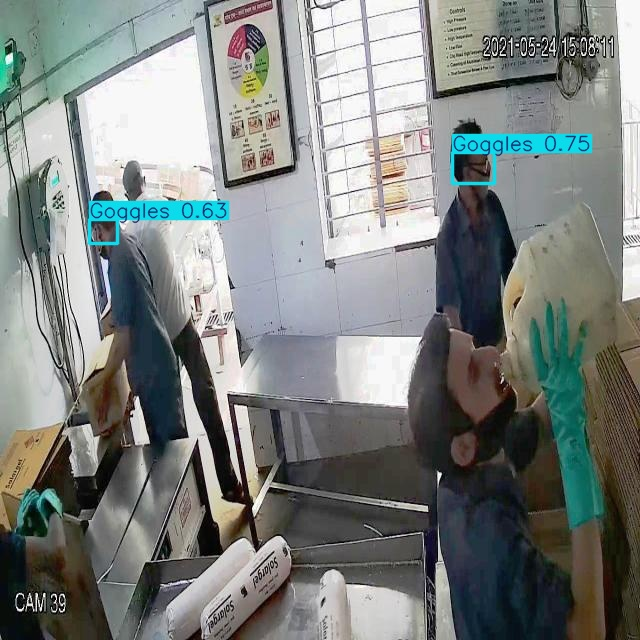

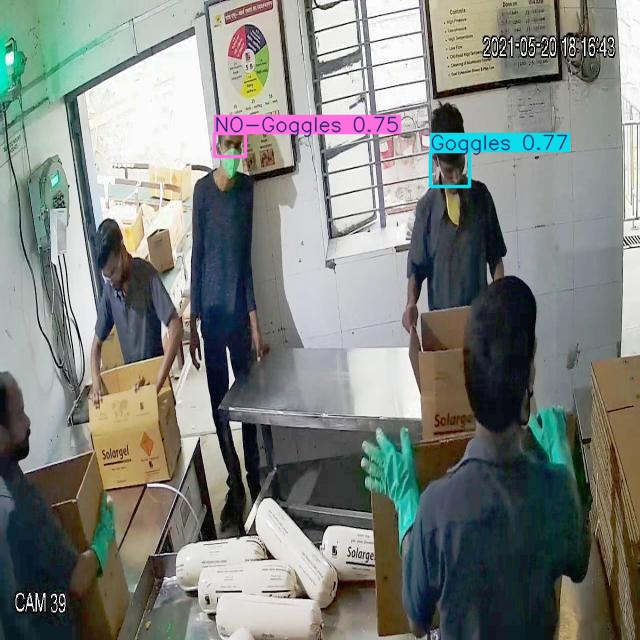

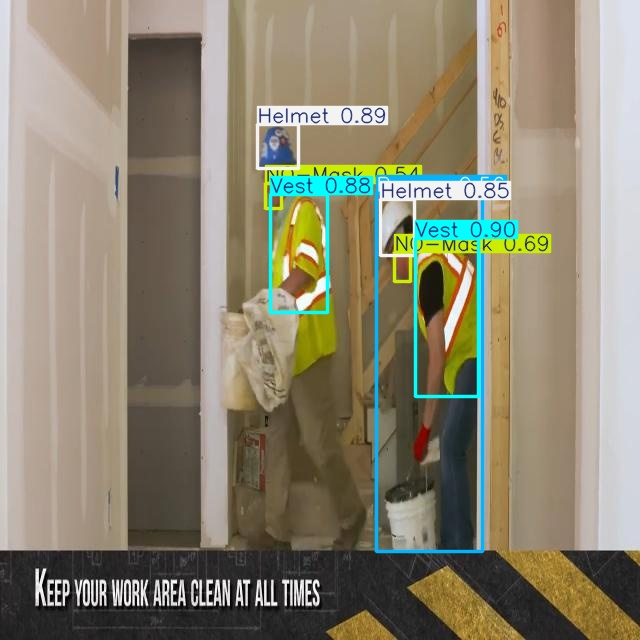

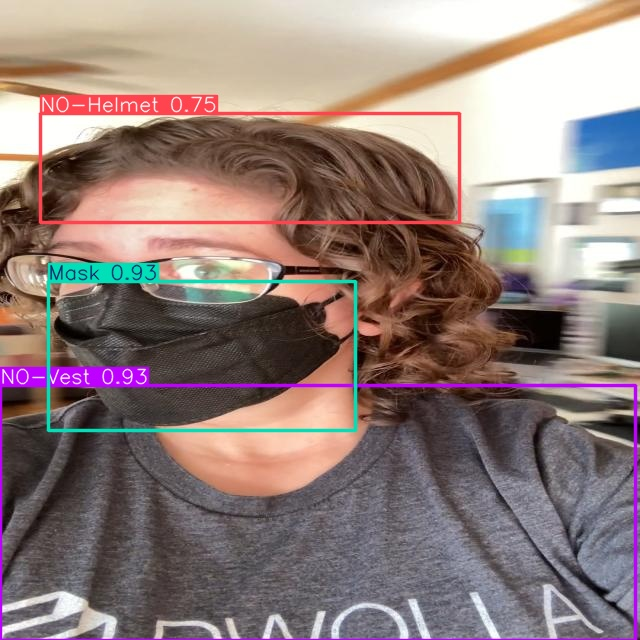

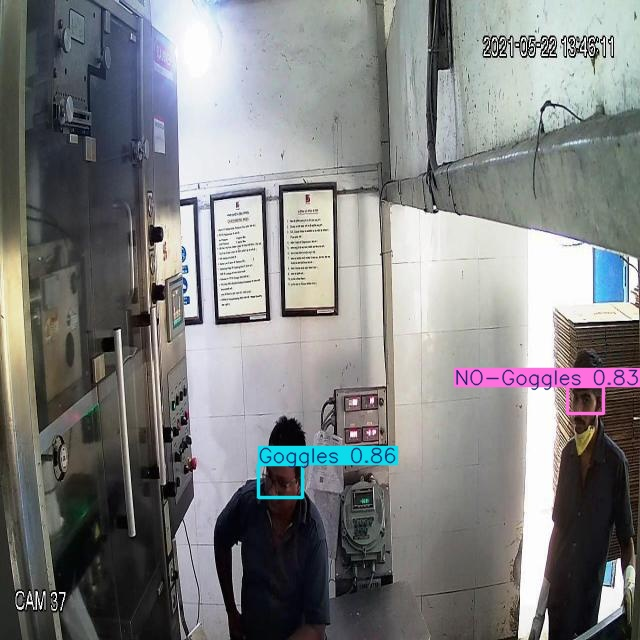

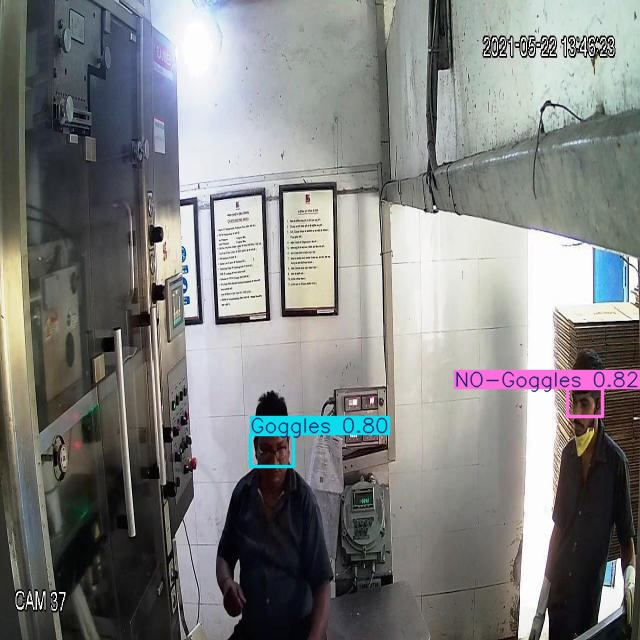

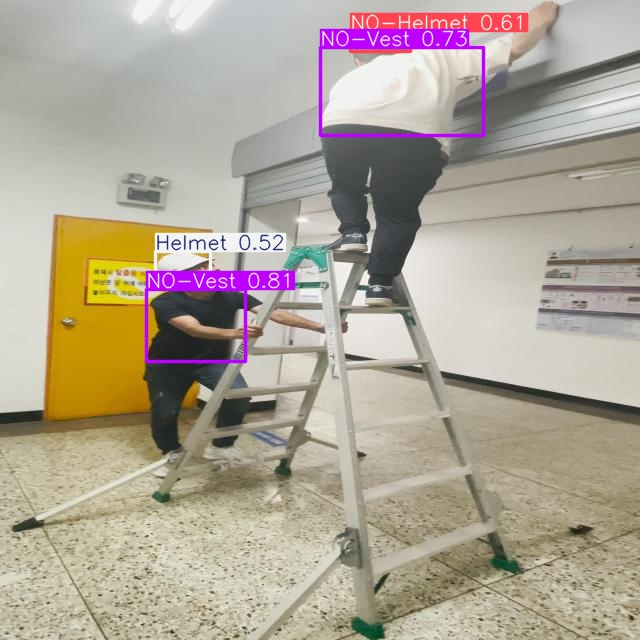

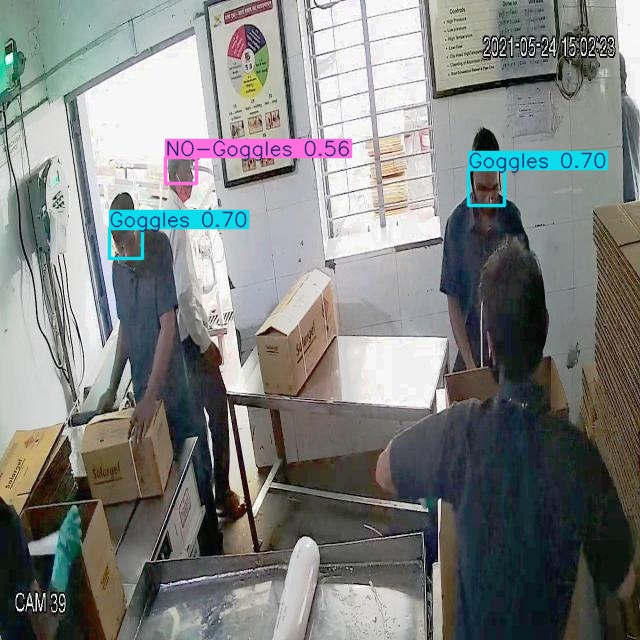

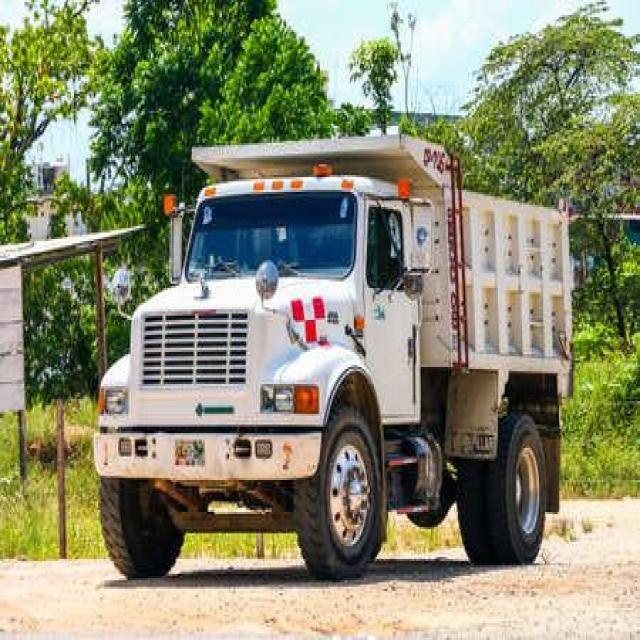

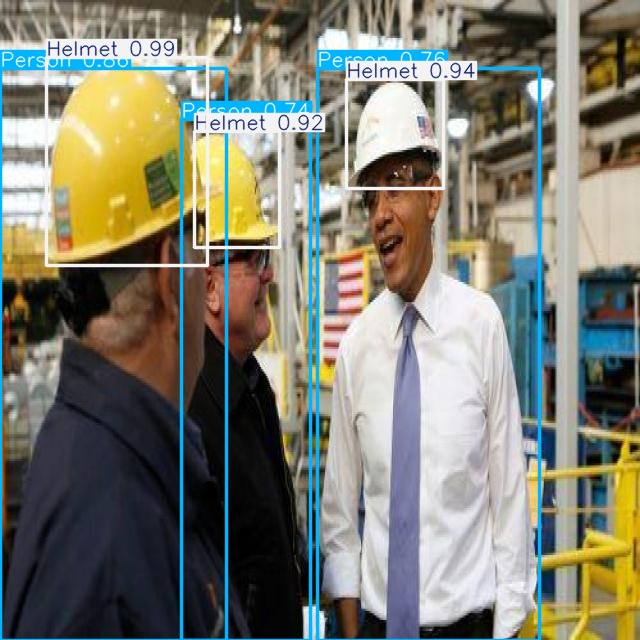

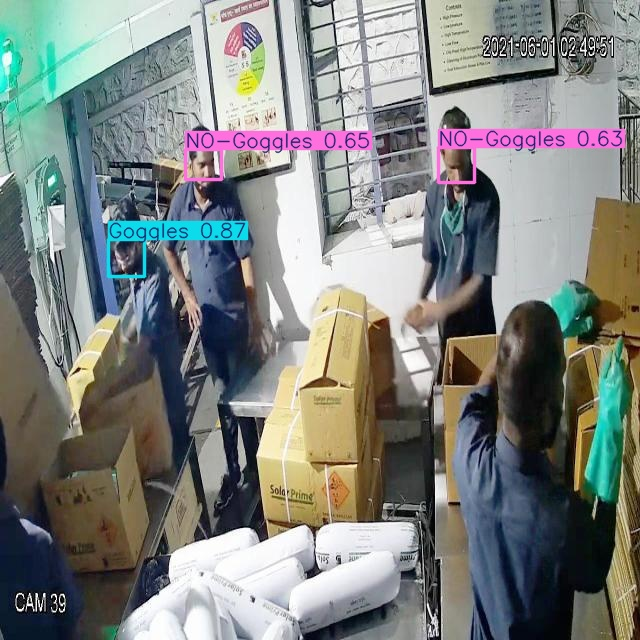

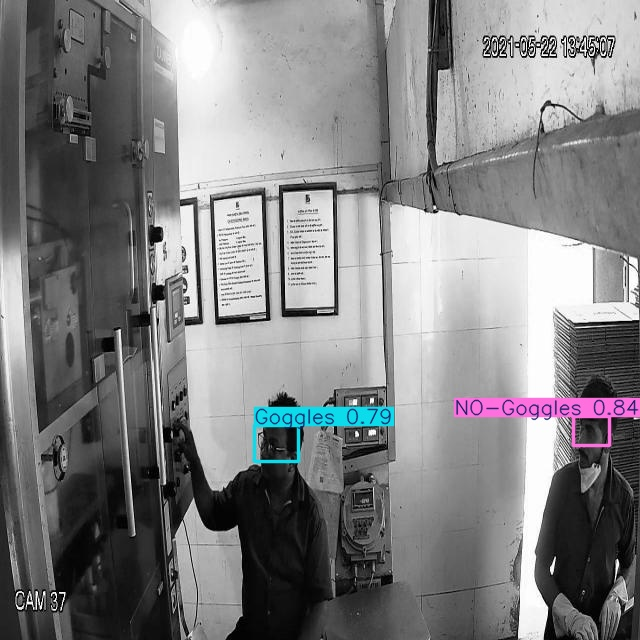

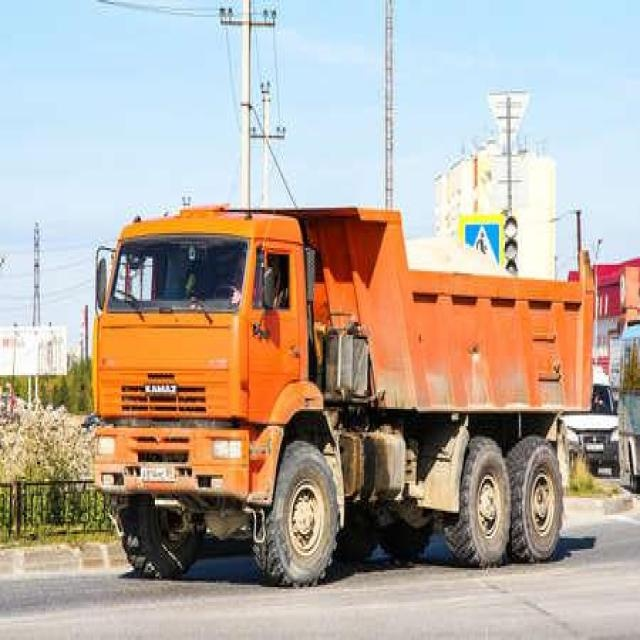

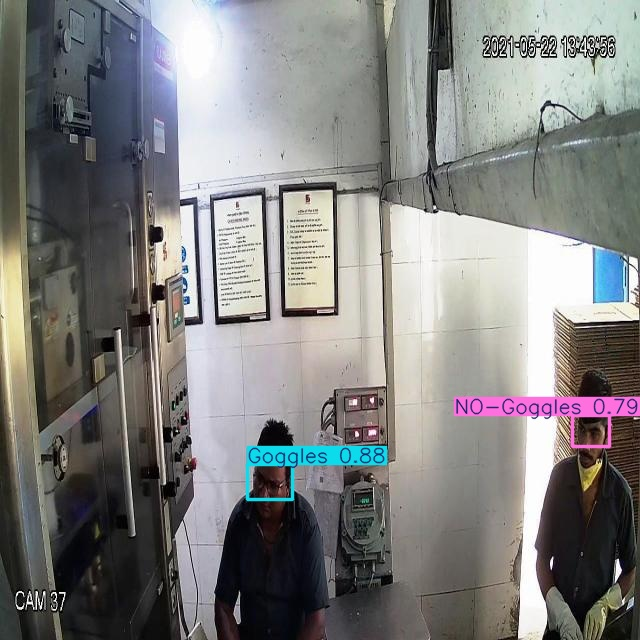

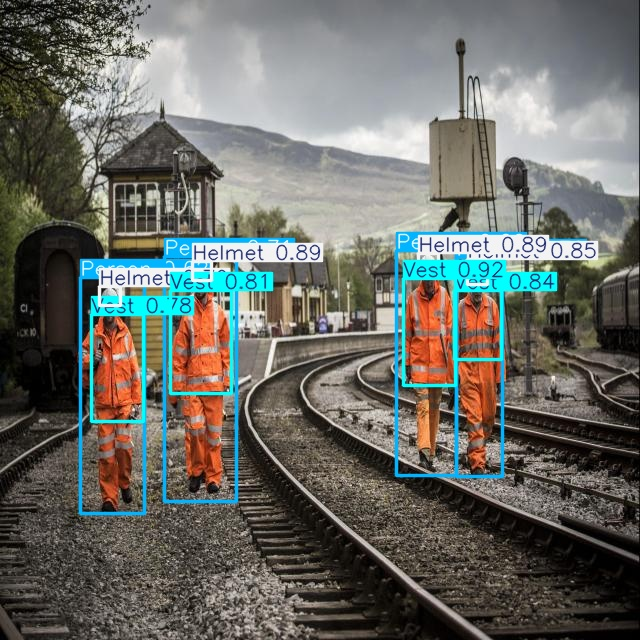

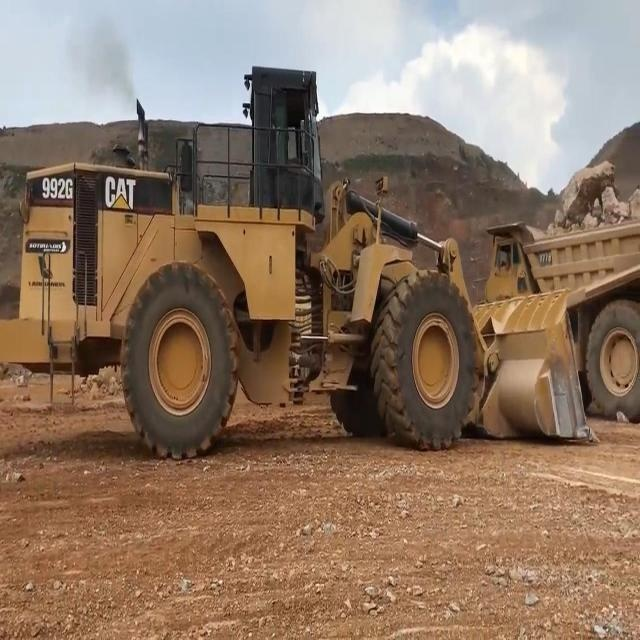

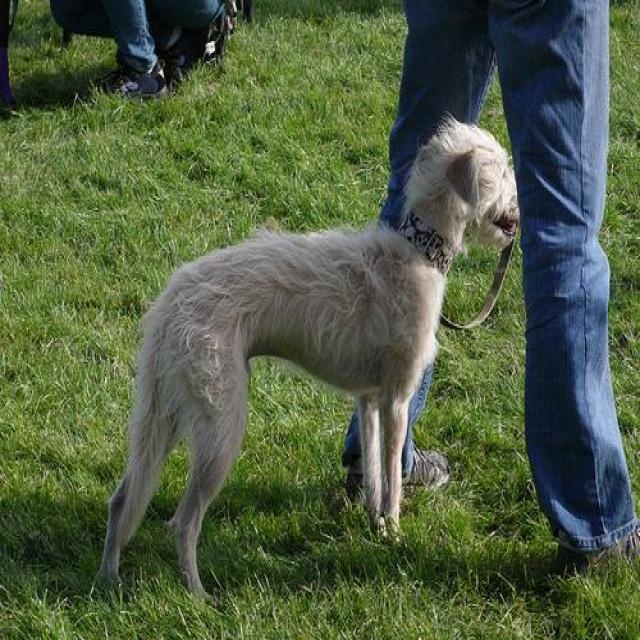

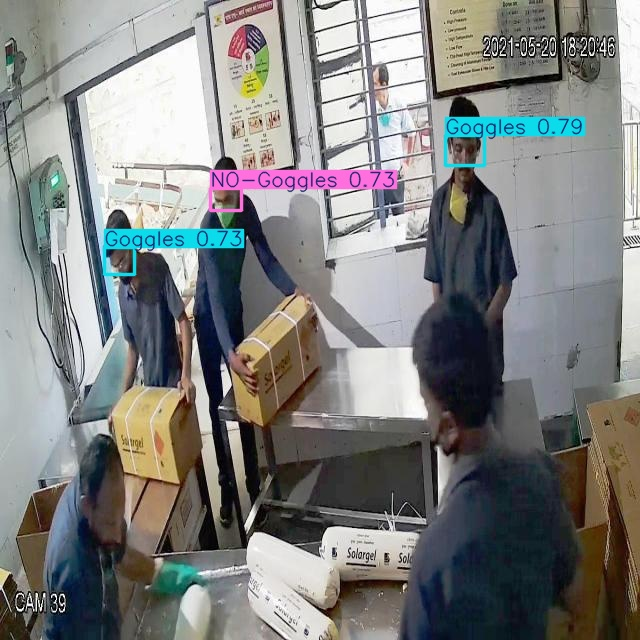

In [11]:
import os
from IPython.display import Image, display

predict_folder = "/kaggle/working/runs/detect/predict"

image_files = [os.path.join(predict_folder, file) for file in os.listdir(predict_folder) if file.endswith(('.jpg', '.png', '.jpeg'))]

image_files = image_files[:20]
for image_file in image_files:
    display(Image(filename=image_file))

In [12]:
# Export the trained YOLOv11 model to TFLite format
!yolo export model=/kaggle/working/runs/detect/train/weights/best.pt format=tflite

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 17, 8400) (5.2 MB)
E0000 00:00:1753272134.516398     153 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753272134.565627     153 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0,<1.4.0', 'onnx>=1.12.0,<1.18.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.59', '

In [13]:
pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import supervision as sv
from supervision.metrics import F1Score
import numpy as np

# Asumsi Anda sudah memiliki:
# detections_model: sv.Detections object dari prediksi model Anda
# ground_truth_annotations: sv.Detections object dari anotasi ground truth Anda

# Inisialisasi F1Score
f1_scorer = F1Score()

# Iterasi melalui gambar di dataset validasi Anda
# Di setiap gambar, lakukan inferensi dan dapatkan deteksi model
# dan muat anotasi ground truth
# Contoh (pseudocode):
# for image_id in validation_images:
#     detections_for_image = model.predict(image).to(sv.Detections)
#     annotations_for_image = load_ground_truth(image_id).to(sv.Detections)
#     f1_scorer.update(detections=detections_for_image, targets=annotations_for_image)

# Setelah mengumpulkan semua deteksi dan target, hitung hasil akhir
# hasil = f1_scorer.compute()
# print(f"F1-score: {hasil['f1']}") # Atau metrik lain yang Anda inginkan

In [15]:
ls -l

total 19476
-rw-r--r-- 1 root root  3932288 Jul 23 12:02 calibration_image_sample_data_20x128x128x3_float32.npy
drwxr-xr-x 5 root root     4096 Jul 23 11:34 construction-ppe-2/
---------- 1 root root 10381760 Jul 23 12:03 __notebook__.ipynb
drwxr-xr-x 3 root root     4096 Jul 23 11:34 runs/
-rw-r--r-- 1 root root  5613764 Jul 23 11:34 yolo11n.pt
